In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import math
import re
import cv2
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.visualization_helpers import *

In [47]:
for fc in ['fc5', 'fc100', 'fc1000', 'fc10000']:

    injected = glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/injections/test/**{fc}.npy') # glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/*/injections/fc5_train/*f250m*fc5.npy') +
    #not_injected =   glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/injections/train/**[!{fc}].npy') #glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/*/injections/fc5_train/*f250m*[!fc5].npy') +


    print(f"{fc} INJECTED:",len(injected))
#print("NOT INJECTED:",len(not_injected))

fc5 INJECTED: 11839
fc100 INJECTED: 11845
fc1000 INJECTED: 11840
fc10000 INJECTED: 0


In [3]:

injected = glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/injections/test/**.npy') # glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/*/injections/fc5_train/*f250m*fc5.npy') +
# not_injected =   glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/injections/train/**[!{fc}].npy') #glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/*/injections/fc5_train/*f250m*[!fc5].npy') +


# print(f"{fc} INJECTED:",len(injected))
#print("NOT INJECTED:",len(not_injected))

In [5]:
train_arrays = glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/injections/train/*fc*.npy')[:25]
len(train_arrays)

25

In [10]:
main_dir = "/data/scratch/bariskurtkaya/dataset/NIRCAM/*"

main_total = 0

for pid_dir in glob.glob(main_dir):
    sub_dir = f"{pid_dir}/mastDownload/JWST/*psfstack*"
    total_psf = 0
    for psfs_dir in glob.glob(sub_dir):
        total_psf += fits.open(psfs_dir)[1].data.shape[0]
    if total_psf != 0:
        print(pid_dir.split('/')[-1], total_psf)

    main_total += total_psf

1412 690
4454 560
1194 45
1193 675
4558 1512
1386 610
1441 669
2278 53
4451 410


In [13]:
4454 , 4451 = 970
Others 4254

1044.8

In [15]:
locations        = get_psf_info(train_arrays,'1386')
info             = get_augmentation_info(train_arrays)
transformed_list = do_transformations(info, locations)
arrays           = get_array(train_arrays)

Set OBSGEO-B to    16.052288 from OBSGEO-[XYZ].
Set OBSGEO-H to 1528813205.103 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.252286 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706760253.307 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.232067 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706579072.560 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.249661 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706736692.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.237096 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706624079.897 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.234025 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706596592.593 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.230546 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706565464.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Distance: 16.1245154965971
Distance: 20.615528128088304
Distance: 22.20360331117452
Distance: 29.068883707497267
Distance: 12.0
Distance: 26.0
Distance: 7.280109889280518
Distance: 20.0
Distance: 17.4928556845359
Distance: 24.041630560342615
Distance: 15.0
Distance: 22.135943621178654
Distance: 15.264337522473747
Distance: 1.4142135623730951
Distance: 11.704699910719626
Distance: 19.924858845171276
Distance: 26.0
Distance: 8.602325267042627
Distance: 20.8806130178211
Distance: 35.0
Distance: 5.0
Distance: 12.806248474865697
Distance: 25.019992006393608
Distance: 19.79898987322333
Distance: 19.1049731745428
Distance: 20.223748416156685
Distance: 25.632011235952593
Distance: 17.11724276862369
Distance: 12.165525060596439
Distance: 13.601470508735444
Distance: 13.341664064126334
Distance: 14.035668847618199
Distance: 11.045361017187261
Distance: 22.02271554554524
Distance: 25.709920264364882
Distance: 20.0
Distance: 1.0
Distance: 17.26267650163207
Distance: 21.470910553583888
Distance: 14

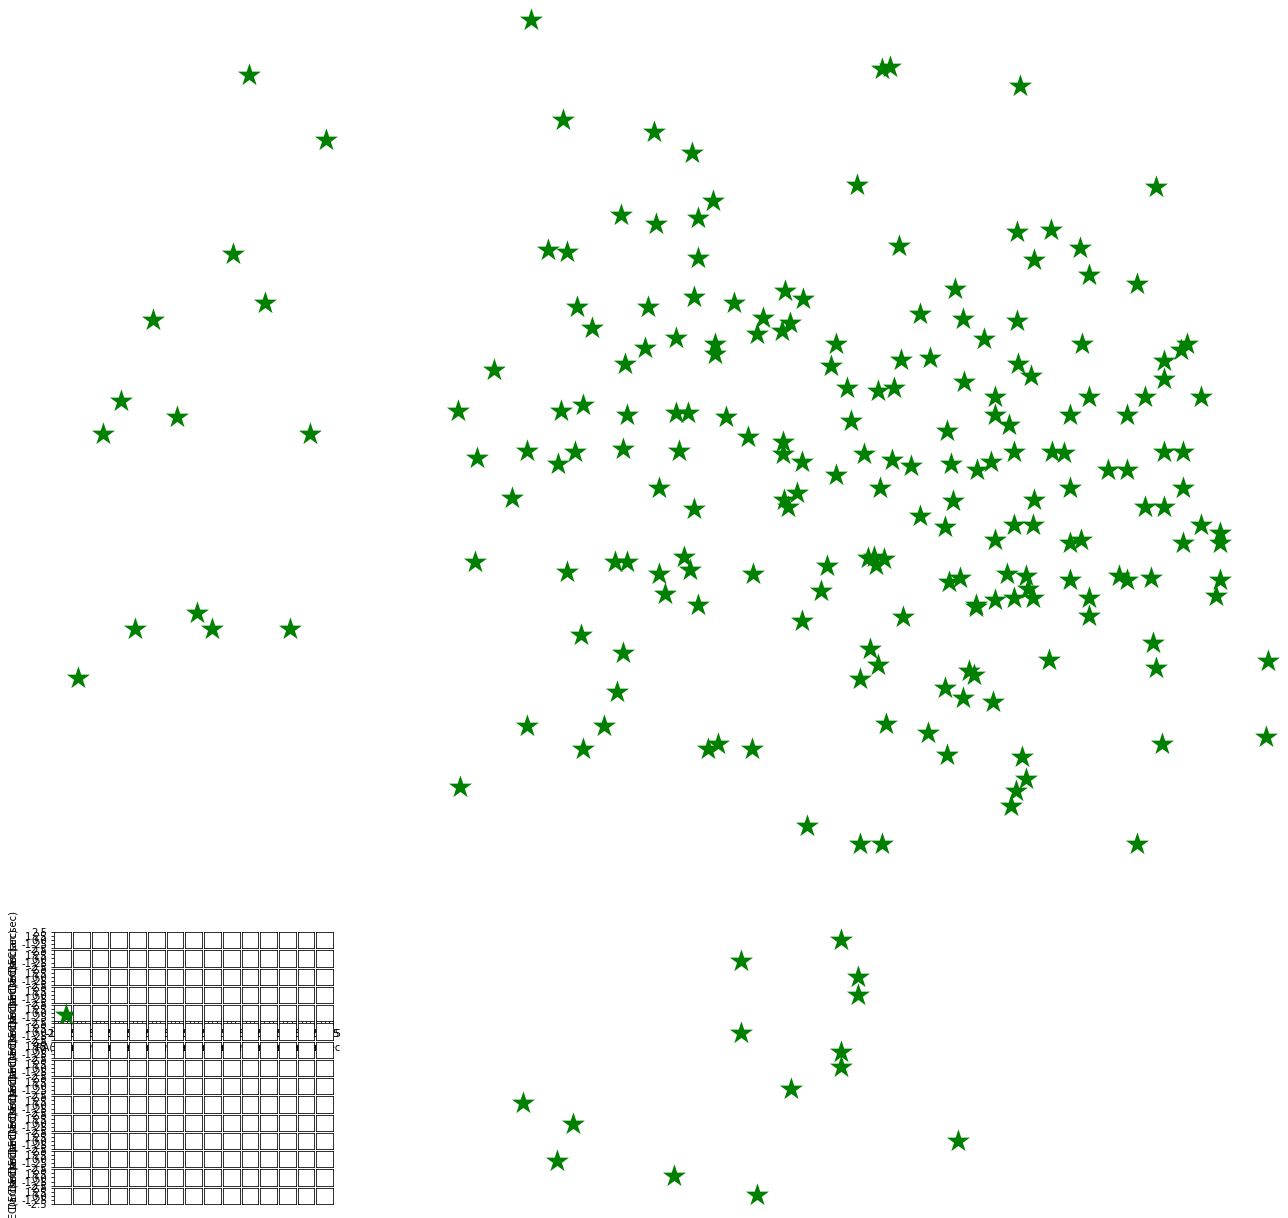

In [16]:
bs = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows,ncols=bs,figsize=(5,5))
distances = []
step = 20*0.06259530358142339
step = round(step,2)
labels = step*np.array([-2., -1., 0., 1., 2.])
axis_points = np.linspace(0,80,5)

for i, (row,col) in enumerate(product(range(nrows),range(bs))):

    idx_x  = train_arrays[i].rfind('x')

    if idx_x == -1:
        x, y = 0, 0
    else:
        x = int(train_arrays[i][idx_x+1:idx_x+3])
        y = int(train_arrays[i][idx_x+5:idx_x+7])

    #x, y = int(train_arrays[i].split('/')[-1].split('-')[-3:-1][0][1:]), int(train_arrays[i].split('/')[-1].split('-')[-3:-1][1][1:])
    #axes[row][col].imshow(arrays[i], interpolation='nearest', cmap='Greys_r')

    if col == 0:
        axes[row][col].set_yticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_ylabel('DEC(arcsec)', fontsize=10)
        
        if row == 4:
            axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
            axes[row][col].set_xlabel('RA(arcsec)', fontsize=10)

        else:
            axes[row][col].set_xticks([])

    elif row == 4:
        axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_xlabel('arcsec', fontsize=10)
        axes[row][col].set_yticks([])

    else:
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])


    #axes[row][col].text(x, y, s="\u25CF", fontsize=12, color='red', alpha=.3, ha='center', va='center')#u"\u2734"
    #axes[row][col].invert_yaxis()

    
    if int(transformed_list[i][0]) == -1:
        pass
    else:
        axes[row][col].text(int(transformed_list[i][0]), int(transformed_list[i][1]) , s="\u2605", fontsize=30, color='green', ha='center', va='center')
    distance = calculate_distance(x1=x,x2=int(transformed_list[i][0]), y1=y,y2=int(transformed_list[i][1]))
    distances.append(distance)
    print("Distance:",distance)
    
plt.subplots_adjust(wspace=.12,hspace=.12)
#plt.savefig('figure.jpg',format='jpg', dpi=300, bbox_inches='tight', pad_inches=.1)
plt.show()

In [17]:
distances_arr = np.array(distances)

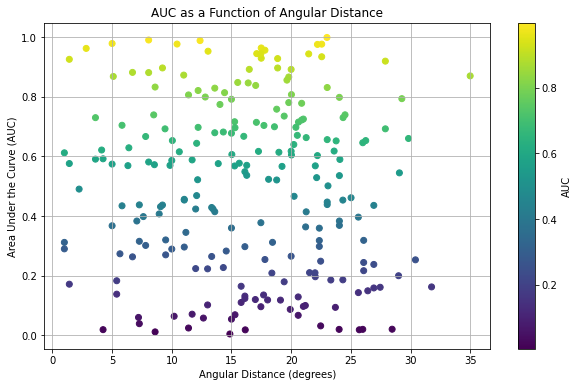

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate data for angular distance
angular_distances = np.linspace(0, 360, 100)  # Simulate 100 angular distances from 0 to 360 degrees

# Step 2: Calculate AUC for each angular distance (This part needs to be replaced with your actual calculation)
# For demonstration, let's assume AUC is calculated randomly
np.random.seed(0)
AUC = np.random.rand(225)  # Random AUC values for demonstration purpose

# Step 3: Plot the AUC as a function of angular distance using a color map
plt.figure(figsize=(10, 6))
plt.scatter(distances_arr, AUC, c=AUC, cmap='viridis')
plt.colorbar(label='AUC')
plt.xlabel('Angular Distance (degrees)')
plt.ylabel('Area Under the Curve (AUC)')
plt.title('AUC as a Function of Angular Distance')
plt.grid(True)
plt.show()

In [21]:
 ultimate_dict = {
        'bin_distances':{'5':[],
                         '15':[], 
                         '25':[],
                         '35':[]},
        'img_paths_bin':{'5':[],
                         '15':[], 
                         '25':[],
                         '35':[]},

        'target':{'5':[1,44,88,132,176],
                  '15':[1,44,88,132,176], 
                  '25':[1,44,88,132,176],
                  '35':[1,44,88,132,176]},

        'probs':{'5':[3,4,5,2,4],
                  '15':[3,4,5,2,4], 
                  '25':[3,4,5,2,4],
                  '35':[3,4,5,2,4]}
    }
    

In [23]:
for key in ultimate_dict['bin_distances']:
    print(key)

5
15
25
35


In [27]:
[str(int(key)/2) for key in ultimate_dict['bin_distances']]

['2.5', '7.5', '12.5', '17.5']

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [31]:
sample_count = 10e+3
flux_coef = torch.arange(sample_count) / sample_count # 0 - 1 normalized 10e+4 samples
flux_coef = flux_coef * (10e-4 - 10e-10) + 10e-10

In [32]:
flux_coef[0] , flux_coef[-1]

(tensor(1.0000e-09), tensor(0.0010))

In [3]:
num_rand_flux = 10**4

flux_coef = torch.randint(num_rand_flux, (num_rand_flux,))

(array([1., 0., 2., ..., 0., 1., 4.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
        9.999e+03]),
 <BarContainer object of 9999 artists>)

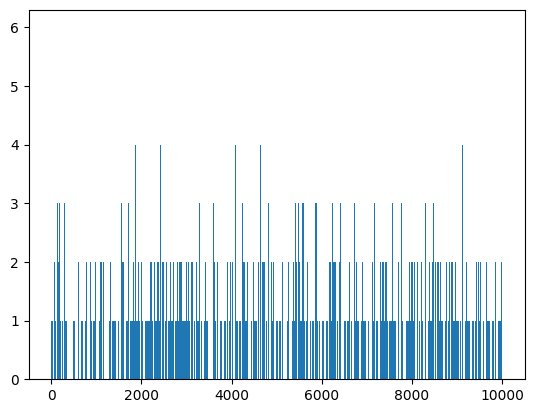

In [15]:
flux_coef.cpu().numpy()
counts, bins = np.histogram(flux_coef, bins=torch.arange(num_rand_flux))
plt.hist(bins[:-1], bins, weights=counts)
